In [172]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [173]:
bin_df = pd.read_pickle('./bin_df.pkl')

In [174]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)

In [175]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

## K-Neighbors Classifier

In [195]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

print(classification_report(k_neighbors.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.24      0.76      0.36        46
           2       0.98      0.86      0.92       820

    accuracy                           0.86       866
   macro avg       0.61      0.81      0.64       866
weighted avg       0.95      0.86      0.89       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


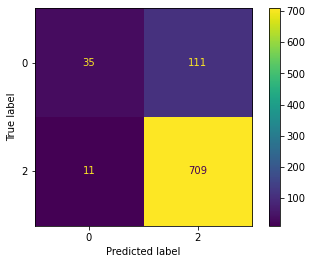

In [196]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [178]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [179]:
y_preds = rfc.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


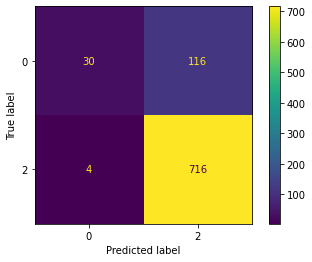

In [180]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

## Support Vector Classifier

In [181]:
svcl = svm.SVC()

svcl.fit(X_train_vect, y_train)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.86      0.16      0.28       146
           2       0.85      0.99      0.92       720

    accuracy                           0.85       866
   macro avg       0.86      0.58      0.60       866
weighted avg       0.85      0.85      0.81       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


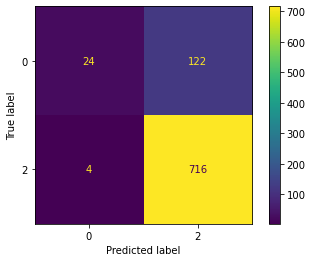

In [182]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [183]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.16      0.86      0.28        28
           2       0.99      0.85      0.92       838

    accuracy                           0.85       866
   macro avg       0.58      0.86      0.60       866
weighted avg       0.97      0.85      0.90       866



## Complementary Naive Bayes Classifier

In [184]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.21      0.77      0.32        39
           2       0.99      0.86      0.92       827

    accuracy                           0.86       866
   macro avg       0.60      0.81      0.62       866
weighted avg       0.95      0.86      0.89       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


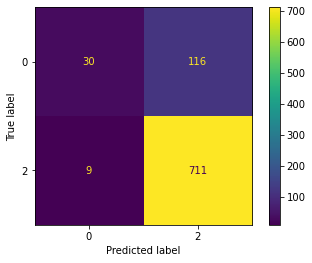

In [185]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boost Classifier

In [186]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.67      0.10      0.17       146
           2       0.84      0.99      0.91       720

    accuracy                           0.84       866
   macro avg       0.76      0.54      0.54       866
weighted avg       0.81      0.84      0.79       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


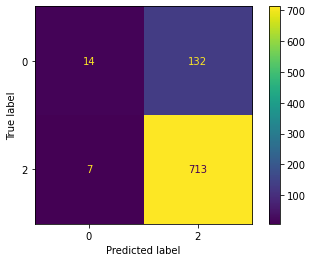

In [187]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

# Rinse, SMOTE, Repeat

In [188]:
oversample = SMOTE()
X_train_vect_smote, y_smote = oversample.fit_resample(X_train_vect, y_train)

## Complementary Naive Bayes Classifier (w/ SMOTE)

In [189]:
cnb = ComplementNB()

cnb.fit(X_train_vect_smote, y_smote)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.62      0.46      0.53       194
           2       0.86      0.92      0.89       672

    accuracy                           0.82       866
   macro avg       0.74      0.69      0.71       866
weighted avg       0.80      0.82      0.81       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


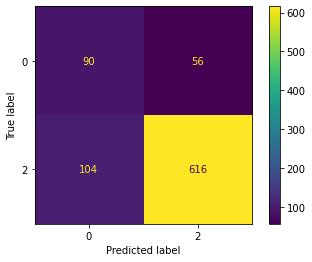

In [190]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boosting Classifier (w/ SMOTE)

In [191]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect_smote, y_smote)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       146
           2       0.87      0.93      0.90       720

    accuracy                           0.82       866
   macro avg       0.67      0.62      0.64       866
weighted avg       0.80      0.82      0.81       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


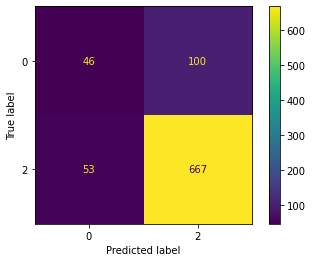

In [192]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

## Support Vector Classifier (w/ SMOTE)

In [193]:
svcl = svm.SVC()

svcl.fit(X_train_vect_smote, y_smote)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.88      0.21      0.33       146
           2       0.86      0.99      0.92       720

    accuracy                           0.86       866
   macro avg       0.87      0.60      0.63       866
weighted avg       0.86      0.86      0.82       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


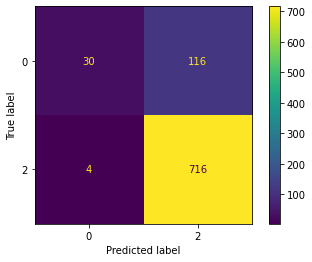

In [194]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

## K-Neighbors Classifier (w/ SMOTE)

In [197]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect_smote, y_smote)

print(classification_report(k_neighbors.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.99      0.20      0.33       737
           2       0.18      0.98      0.30       129

    accuracy                           0.31       866
   macro avg       0.58      0.59      0.31       866
weighted avg       0.87      0.31      0.32       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


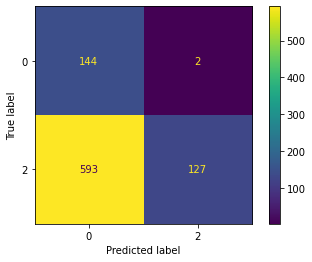

In [198]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)